In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

In [7]:
numCol=[]
catCol=[]
for i in df.columns:
    if df[i].dtype == 'O':
        catCol.append(i)
    else:
        numCol.append(i)

In [8]:
df[catCol].dtypes

Cust_name           object
Product_ID          object
Gender              object
Age Group           object
State               object
Zone                object
Occupation          object
Product_Category    object
dtype: object

In [9]:
df[catCol].describe().T

,count,unique,top,freq
Cust_name,11251,1250,Vishakha,42
Product_ID,11251,2351,P00265242,53
Gender,11251,2,F,7842
Age Group,11251,7,26-35,4543
State,11251,16,Uttar Pradesh,1946
Zone,11251,5,Central,4296
Occupation,11251,15,IT Sector,1588
Product_Category,11251,18,Clothing & Apparel,2655


In [12]:
df[numCol].dtypes

User_ID             int64
Age                 int64
Marital_Status      int64
Orders              int64
Amount            float64
Status            float64
unnamed1          float64
dtype: object

In [13]:
df[numCol].describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,11251.0,1.003004e+06,1716.125402,1000001.0,1001492.0,1003065.0,1004430.0,1006040.0
Age,11251.0,3.542121e+01,12.754122,12.0,27.0,33.0,43.0,92.0
Marital_Status,11251.0,4.203182e-01,0.493632,0.0,0.0,0.0,1.0,1.0
Orders,11251.0,2.489290e+00,1.115047,1.0,1.5,2.0,3.0,4.0
Amount,11239.0,9.453611e+03,5222.355869,188.0,5443.0,8109.0,12675.0,23952.0
Status,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unnamed1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df['Marital_Status']

0        0
1        1
2        1
3        0
4        1
        ..
11246    1
11247    0
11248    0
11249    0
11250    0
Name: Marital_Status, Length: 11251, dtype: int64

In [17]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [35]:
df[df.isna().sum(axis=1)>3]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount


In [19]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [20]:
numCol

['User_ID', 'Age', 'Marital_Status', 'Orders', 'Amount', 'Status', 'unnamed1']

In [23]:
numCol.remove('unnamed1')

In [24]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [25]:
df[numCol].isna().sum()

User_ID            0
Age                0
Marital_Status     0
Orders             0
Amount            12
dtype: int64

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
imp_median=SimpleImputer(missing_values=np.nan,strategy='median')

In [29]:
df[numCol]=imp_median.fit_transform(df[numCol])

In [30]:
df[numCol].isna().sum()

User_ID           0
Age               0
Marital_Status    0
Orders            0
Amount            0
dtype: int64

In [31]:
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883.0,Praneet,P00029842,M,51-55,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0
4404,1004725.0,Jackson,P00150842,F,36-45,37.0,1.0,Maharashtra,Western,Hospitality,Electronics & Gadgets,4.0,9859.0
5703,1003208.0,Bowman,P00171642,F,26-35,31.0,0.0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4.0,8088.0
5908,1001260.0,Dheeraj,P00344042,M,26-35,28.0,0.0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4.0,8015.0
6173,1001325.0,Reese,P00111742,F,26-35,27.0,1.0,Gujarat,Western,Construction,Electronics & Gadgets,3.0,7923.0
8651,1000083.0,Gute,P00242842,M,26-35,35.0,0.0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3.0,5345.0
8941,1001476.0,Anudeep,P00036842,M,18-25,25.0,0.0,Maharashtra,Western,IT Sector,Clothing & Apparel,4.0,5202.0
10571,1004404.0,Rittenbach,P00150142,F,26-35,28.0,1.0,Haryana,Northern,Aviation,Electronics & Gadgets,3.0,2304.0


In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount


In [36]:
df[numCol].describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,11243.0,1.003005e+06,1716.141071,1000001.0,1001494.0,1003065.0,1004430.0,1006040.0
Age,11243.0,3.542284e+01,12.756369,12.0,27.0,33.0,43.0,92.0
Marital_Status,11243.0,4.202615e-01,0.493623,0.0,0.0,0.0,1.0,1.0
Orders,11243.0,2.488749e+00,1.114960,1.0,1.0,2.0,3.0,4.0
Amount,11243.0,9.452649e+03,5219.125950,188.0,5444.0,8109.0,12672.0,23952.0


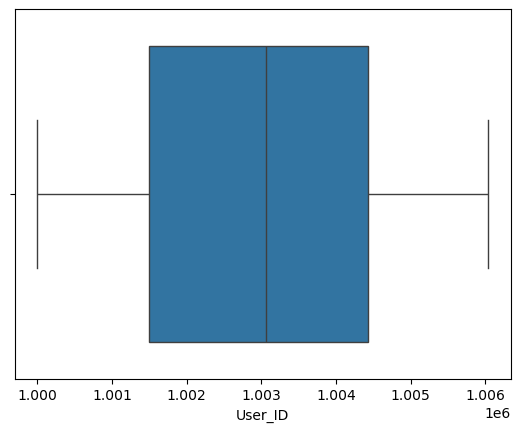

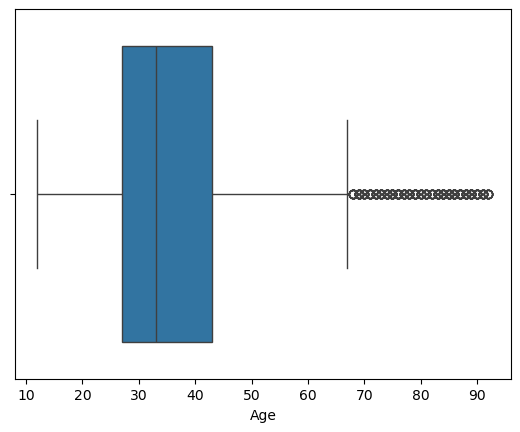

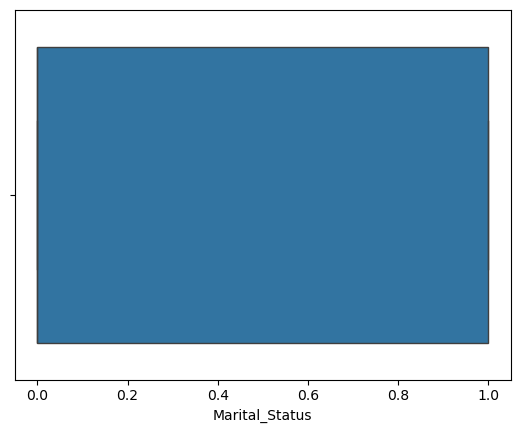

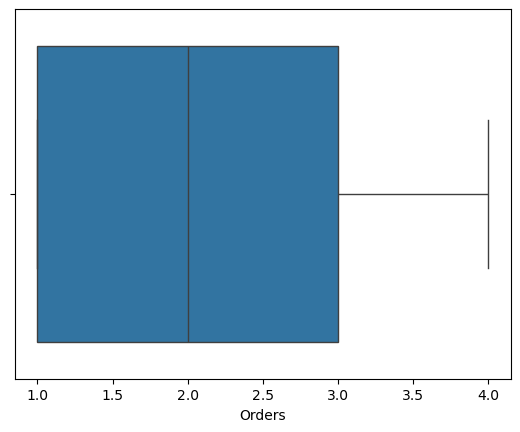

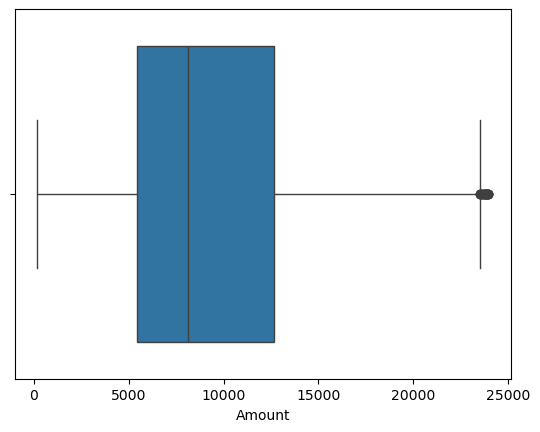

In [37]:
for i in numCol:
    plt.figure()
    sns.boxplot(x=df[i])

In [42]:
df['Amount'].max()

23952.0

In [43]:
df[numCol].describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,11243.0,1.003005e+06,1716.141071,1000001.0,1001494.0,1003065.0,1004430.0,1006040.0
Age,11243.0,3.542284e+01,12.756369,12.0,27.0,33.0,43.0,92.0
Marital_Status,11243.0,4.202615e-01,0.493623,0.0,0.0,0.0,1.0,1.0
Orders,11243.0,2.488749e+00,1.114960,1.0,1.0,2.0,3.0,4.0
Amount,11243.0,9.452649e+03,5219.125950,188.0,5444.0,8109.0,12672.0,23952.0


<Axes: >

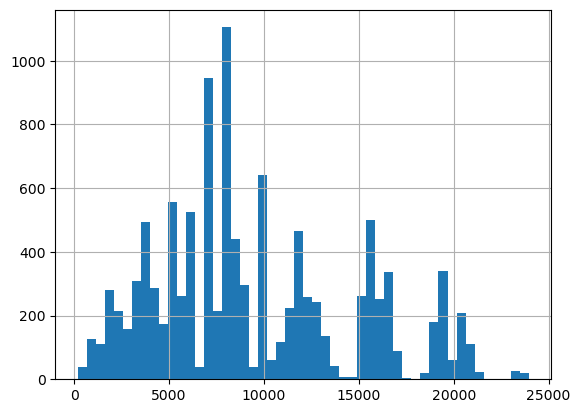

In [44]:
df['Amount'].hist(bins=50)

In [50]:
df_copy=df.copy()

In [52]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_copy['outliers'] = ((df['Amount'] < lower_limit) | (df['Amount'] > upper_limit))
print(df_copy['outliers'])

0         True
1         True
2         True
3         True
4         True
         ...  
11246    False
11247    False
11248    False
11249    False
11250    False
Name: outliers, Length: 11243, dtype: bool


In [55]:
df_copy[df_copy['outliers']==True]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,outliers
0,1002903.0,Sanskriti,P00125942,F,26-35,28.0,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.00,True
1,1000732.0,Kartik,P00110942,F,26-35,35.0,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.00,True
2,1001990.0,Bindu,P00118542,F,26-35,35.0,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924.00,True
3,1001425.0,Sudevi,P00237842,M,0-17,16.0,0.0,Karnataka,Southern,Construction,Auto,2.0,23912.00,True
4,1000588.0,Joni,P00057942,M,26-35,28.0,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877.00,True
5,1000588.0,Joni,P00057942,M,26-35,28.0,1.0,Himachal Pradesh,Northern,Food Processing,Auto,1.0,23877.00,True
6,1001132.0,Balk,P00018042,F,18-25,25.0,1.0,Uttar Pradesh,Central,Lawyer,Auto,4.0,23841.00,True
8,1003224.0,Kushal,P00205642,M,26-35,35.0,0.0,Uttar Pradesh,Central,Govt,Auto,2.0,23809.00,True
9,1003650.0,Ginny,P00031142,F,26-35,26.0,1.0,Andhra Pradesh,Southern,Media,Auto,4.0,23799.99,True
10,1003829.0,Harshita,P00200842,M,26-35,34.0,0.0,Delhi,Central,Banking,Auto,1.0,23770.00,True


In [56]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

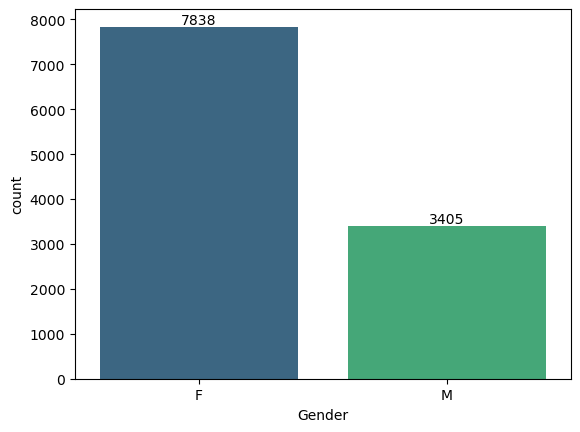

In [59]:
ax=sns.countplot(x='Gender',data=df,hue='Gender',palette='viridis')

for bars in ax.containers:
    ax.bar_label(bars)

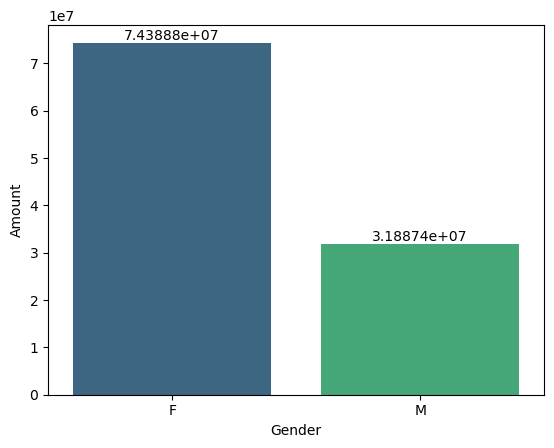

In [93]:
sales_gen=df.groupby('Gender',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

ax=sns.barplot(x='Gender',y='Amount',data=sales_gen,hue='Gender',palette='viridis')

for bars in ax.containers:
    ax.bar_label(bars)

In [63]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

[]

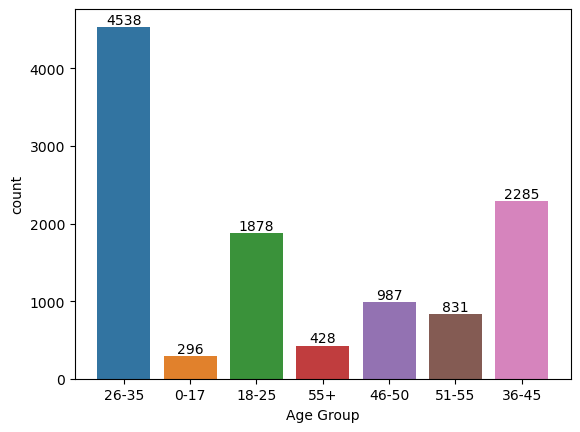

In [84]:
ax=sns.countplot(x='Age Group', data =df,hue='Age Group',linewidth=0)
for bars in ax.containers:
    ax.bar_label(bars)
plt.plot()

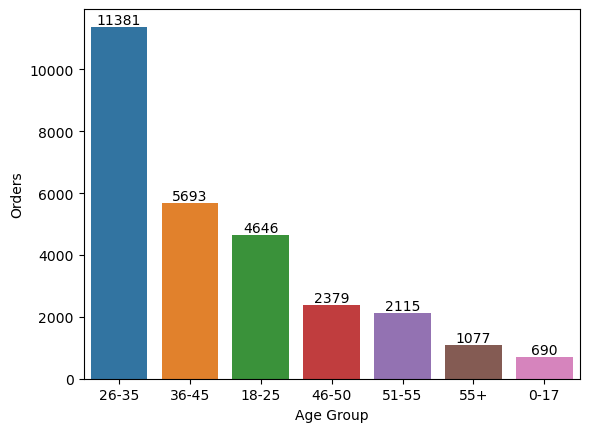

In [92]:
sales_agegroup=df.groupby('Age Group')['Orders'].sum().reset_index().sort_values(by='Orders',ascending=False)

ax=sns.barplot(x='Age Group',y='Orders',data=sales_agegroup,hue='Age Group', errorbar=None)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

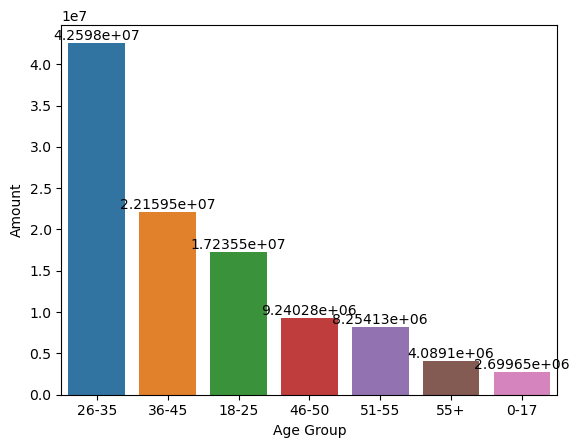

In [91]:
sales_agegroup=df.groupby('Age Group')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False)

ax=sns.barplot(x='Age Group',y='Amount',data=sales_agegroup,hue='Age Group', errorbar=None)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

From above graph we can see that most of the buyers are of age group between 26-35 but purhcasing power of the age_groups are between 26-35

In [85]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [100]:
sales_state=df.groupby('State',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)


In [101]:
sales_state

,State,Orders
14,Uttar Pradesh,4809.0
10,Maharashtra,3799.0
7,Karnataka,3241.0
2,Delhi,2744.0
9,Madhya Pradesh,2259.0
0,Andhra Pradesh,2054.0
5,Himachal Pradesh,1568.0
8,Kerala,1137.0
4,Haryana,1106.0
3,Gujarat,1067.0


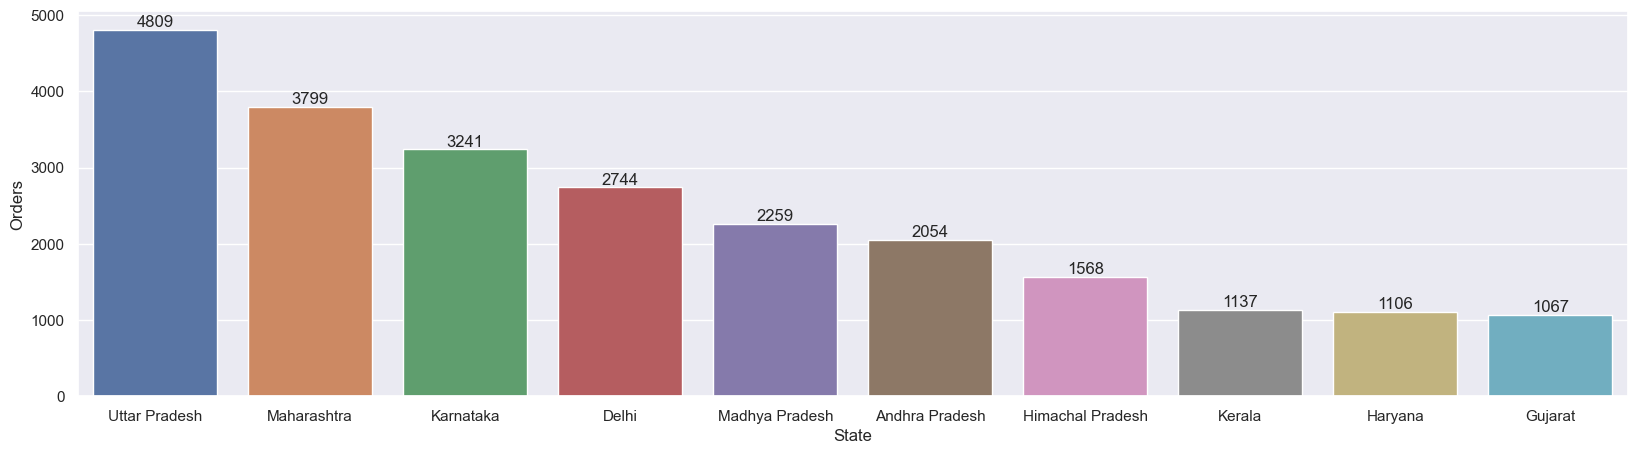

In [102]:
ax=sns.barplot(x='State',y='Orders',data=sales_state,hue='State',errorbar=None)
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

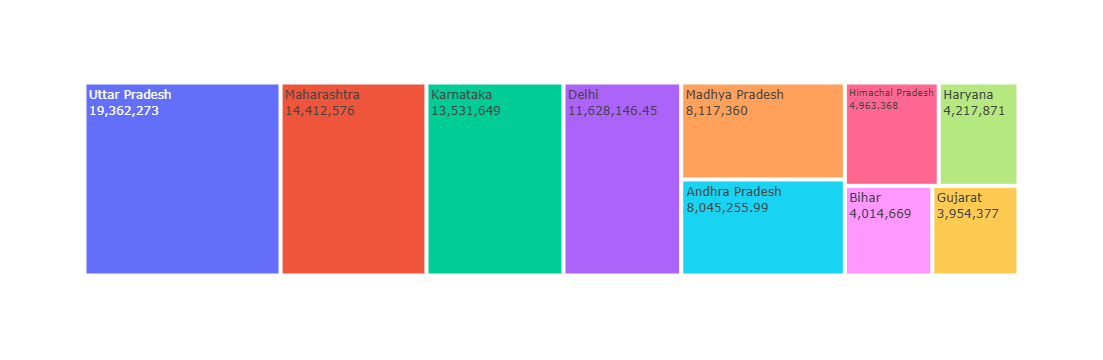

In [115]:
import plotly.express as px
sales_state=df.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
ax=px.treemap(sales_state,path=['State'],values='Amount')
ax.update_traces(textinfo='label+value')
ax.show()

In [104]:
df['Marital_Status']

0        0.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
11246    1.0
11247    0.0
11248    0.0
11249    0.0
11250    0.0
Name: Marital_Status, Length: 11243, dtype: float64

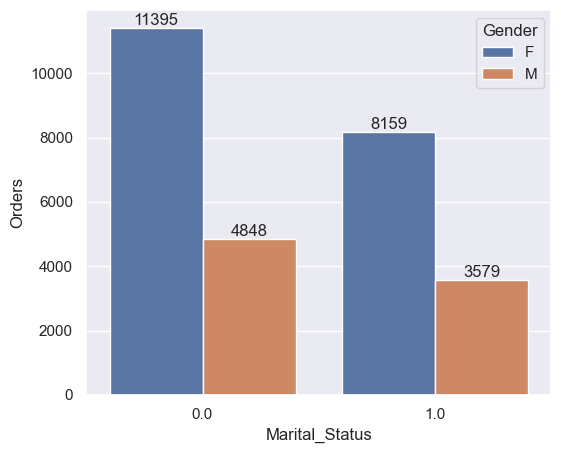

In [121]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
ax=sns.barplot(x='Marital_Status',y='Orders',data=sales_state,hue='Gender',errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)

In [118]:
sales_state

,State,Amount
14,Uttar Pradesh,19362273.00
10,Maharashtra,14412576.00
7,Karnataka,13531649.00
2,Delhi,11628146.45
9,Madhya Pradesh,8117360.00
0,Andhra Pradesh,8045255.99
5,Himachal Pradesh,4963368.00
4,Haryana,4217871.00
1,Bihar,4014669.00
3,Gujarat,3954377.00


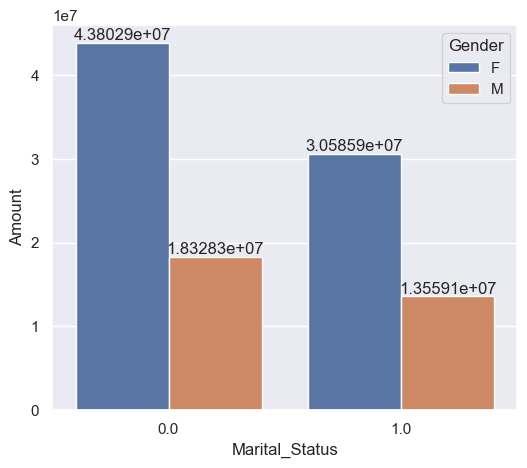

In [122]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
ax=sns.barplot(x='Marital_Status',y='Amount',data=sales_state,hue='Gender',errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)

In [123]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

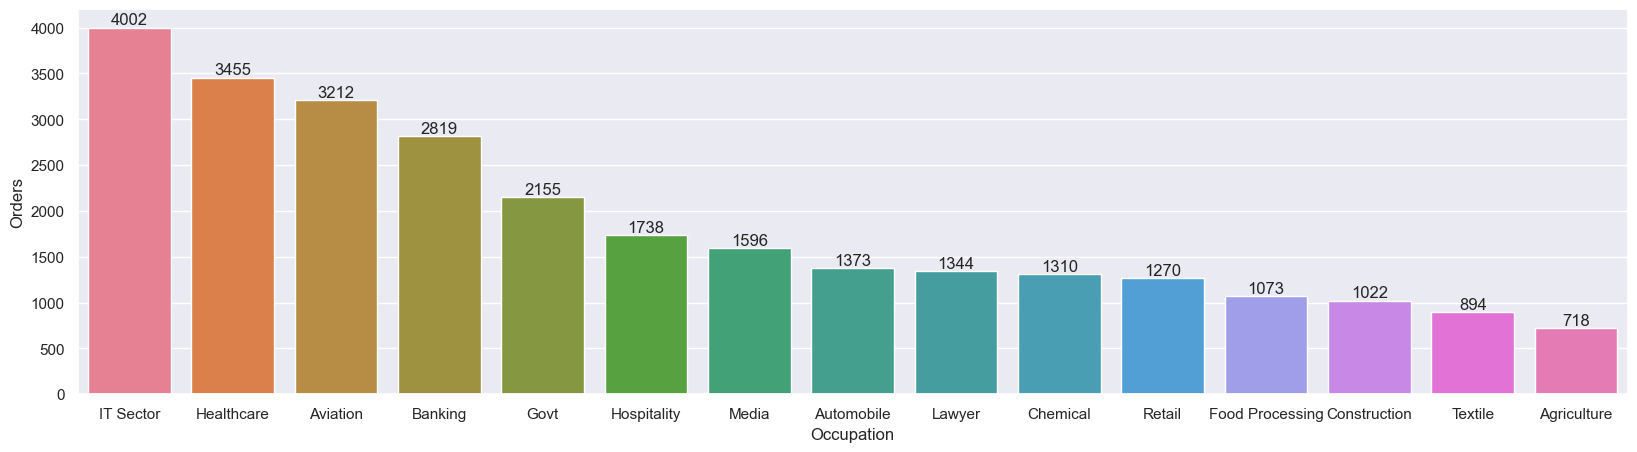

In [126]:
sales_state=df.groupby('Occupation',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(data=sales_state,x='Occupation',y='Orders',hue='Occupation',errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)

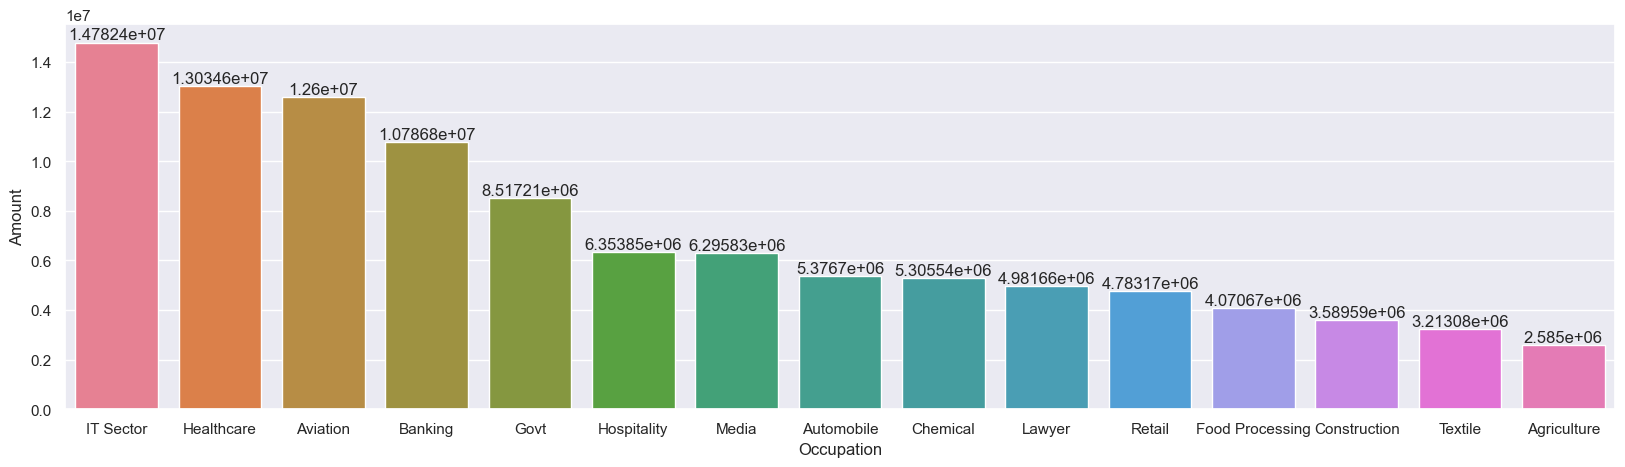

In [127]:
sales_state=df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(data=sales_state,x='Occupation',y='Amount',hue='Occupation',errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)

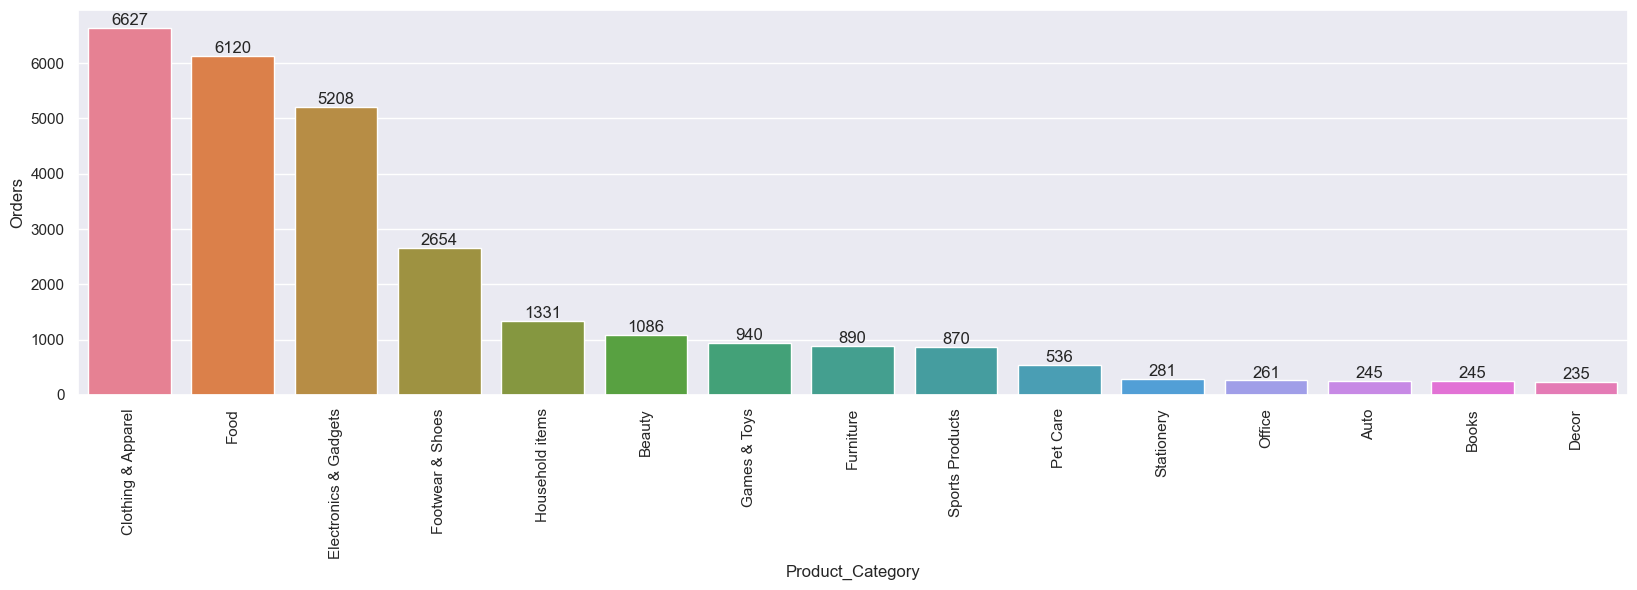

In [131]:
sales_state=df.groupby('Product_Category',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(15)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(rotation=90)
ax=sns.barplot(data=sales_state,x='Product_Category',y='Orders',hue='Product_Category',errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)

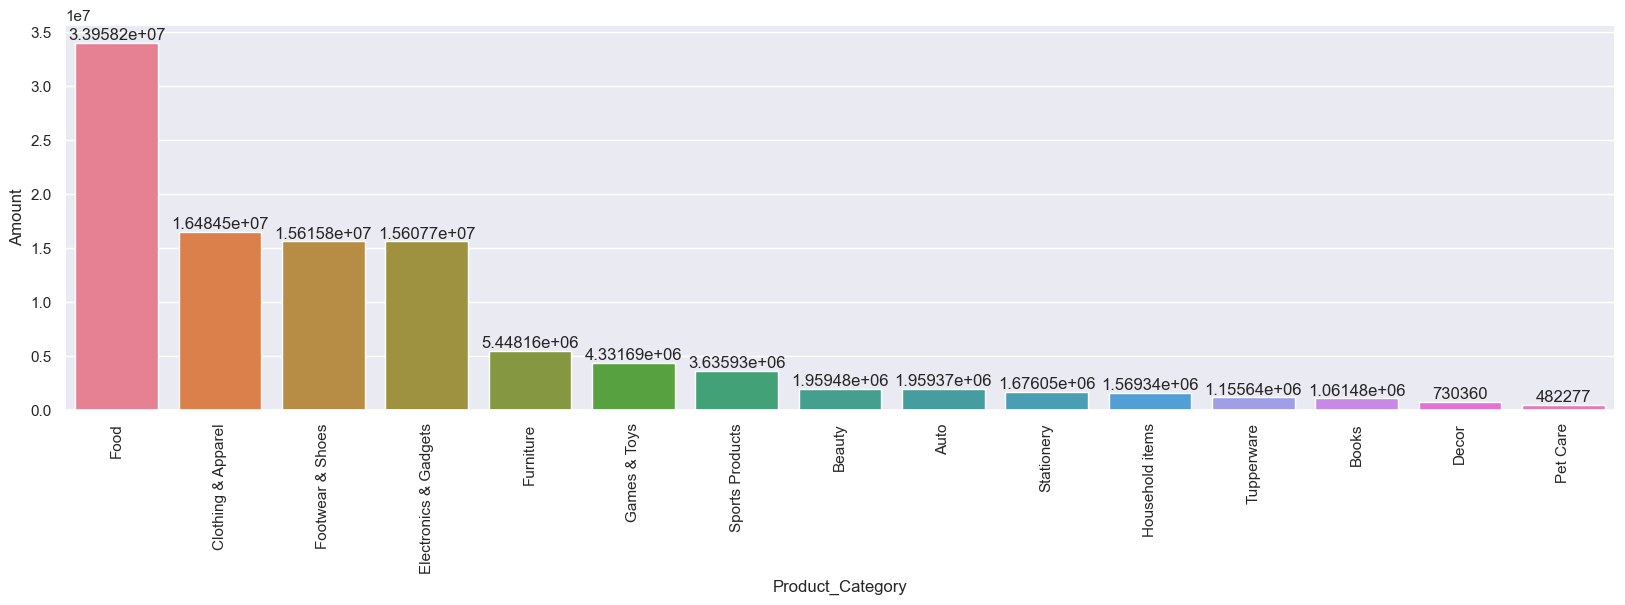

In [132]:
sales_state=df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(15)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(rotation=90)
ax=sns.barplot(data=sales_state,x='Product_Category',y='Amount',hue='Product_Category',errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
df.columns

In [ ]:
sns.barplot(data=df,x='Product_ID',y='Orders').head(10)

In [137]:
df[catCol].describe().T

,count,unique,top,freq
Cust_name,11243,1250,Vishakha,42
Product_ID,11243,2351,P00265242,53
Gender,11243,2,F,7838
Age Group,11243,7,26-35,4538
State,11243,16,Uttar Pradesh,1944
Zone,11243,5,Central,4294
Occupation,11243,15,IT Sector,1586
Product_Category,11243,18,Clothing & Apparel,2653
